In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics

from sklearn.naive_bayes import CategoricalNB

# Multunomiale Naive Bayes

## I) Theory

Naive Bayes models are a type of classification algorithm that is fast, simple and is suitable for classification probleme because the data set is high-dimensional.
This model will be a baseline for our Multi-Class classification problem since they are so fast and have so few configurable parameters.

### 1) Equations

The model is based on Bayes theorem, an equation that describes the relationship between conditional probabilities of statistical quantities.
We want to find the probability of a Sector $S$ given certain observed features in Bayesian classification, which we can write as $P(S~|~{\rm features})$.
We have with the Bayes theorem that :

$$
P(S~|~{\rm features}) = \frac{P({\rm features}~|~S)P(S)}{P({\rm features})}
$$

If we want to choose between two labels, let's call them $S_1$ and $S_2$, one technique to do so is to compute the ratio of their posterior probabilities:

$$
\frac{P(S_1~|~{\rm features})}{P(S_2~|~{\rm features})} = \frac{P({\rm features}~|~S_1)}{P({\rm features}~|~S_2)}\frac{P(S_1)}{P(S_2)}
$$


All we need now is a model that can calculate $P(rm features|S_i)$ for each label.
A *generative model* is one that specifies specifies the hypothetical random process that generates the data.
The fundamental component of training a Bayesian classifier is specifying this generative model for each label.
The general version of such a training phase is a challenging operation, but we may simplify it by making some simplifying assumptions about the model's shape.

In the next part of this notebook we will use Categorical Naive Bayes because it's the one that best fits our problem.

### 2) Categorical Naive Bayes

It is assumed that the features are generated by a basic multinomial distribution.
Because the multinomial distribution explains the chance of detecting counts across several categories, categorical naive Bayes is best suited for features that represent counts or count rates.

## II) Advantages and Drawbacks

Advantages :
- This algorithm works very fast and can easily predict the class of a test dataset. 
- For very high-dimensional data, when model complexity is less important
- Naive Bayes classifier performs better than other models with less training data if the assumption of independence of features holds. 
- They provide straightforward probabilistic prediction.
- They are often easily interpretable.
- They have few (if any) tunable parameters.

These advantages mean a naive Bayes classifier is often a good choice as an initial baseline classification.

!!!!!!!! A réécrire !!!!!!!
The final two statements appear to be unrelated, but they are: as the dimensionality of a dataset increases, it becomes far less likely that any two points will be located near together (after all, they must be close in *every single dimension* to be close overall).
This suggests that clusters in high dimensions are more separated than clusters in low dimensions on average, provided the new dimensions add information.
As a result, as the dimensionality increases, simplest classifiers like the ones mentioned here tend to perform as well as or better than more complicated classifiers: provided you have enough data, even a simple model can be very strong.
!!!!!!!! A réécrire !!!!!!!

drawbacks :
- If your test data set contains a categorical variable from a category that was not present in the training data set, the Naive Bayes model will assign it zero probability and will be unable to make predictions. This phenomena is known as 'Zero Frequency,' and it must be solved using a smoothing process.
- This approach is also known for being a poor estimator. As a result, you shouldn't take the 'predict_proba' probability results too seriously. 
- It is assumed that all of the features are self-contained. While it may seem excellent in principle, it is rare to find a collection of independent traits in practice. 

## II) Python implementation

As this model is just a baseline, we won't go into the details of the automation of Grid Research or Cross Validation. We'll just look at how these steps work in detail.. Indeed, this model will never be used in the future, as our data set is so imbalanced that certain probabilities are likely to be zero if they are not in the train set.

To see the implementation of automation for other steps such as Grid Research or Cross Validation, please consult the next Notebook.

### 1) Importing and setting up data

We'll start by importing the data and structuring it for further processing, by removing columns of no interest and rows without labels. Then we'll separate the dataset into two parts: the training part, which represents 80% of the data we have, and the test part, for the remaining 20%.


In [2]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\Data_Preprocessing\data_clean\clean.csv')
df = df.drop('Unnamed: 0', axis=1)
df = df.drop(labels=22426, axis=0)

y = df[["Secteur"]]
df_features = df.drop(["Code_produit", "Secteur", "Famille"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(df_features, y, test_size=0.2, shuffle=True, random_state=42)

X_train.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\X_train.csv')
X_test.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\X_test.csv')
y_train.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\y_train.csv')
y_test.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\models\data\y_test.csv')

### 2) Hyperparameters tuning

Despite the fact that this model only represents a baseline for our project, and that we know in advance, given the presence of an imbalanced dataset, that certain sectors will have a zero probability of appearing, we know that this model will not be used in the future. However, the naive bayes classifier will be used to introduce the various concepts and algorithms we'll be using later.
There are different hyperparameters that needs tuning to get best fit for our data.

- alpha:
It accepts float values that represent the additive smoothing parameter alpha. A value of 0.0 indicates that there is no smoothing. This parameter's default value is 1.0.
We're going to run our first tuning tests with this hyperparameter.


- min_categories:
It provides an integer or an array of shape (n_features,) defining the minimum categories to consider for each feature. 
This parameter will be obviously fix to 31.

- fit_prior:
It receives a boolean value indicating whether or not to learn prior class probability. This parameter will be fix to True because if it is fixed to false the uniform prior will be used which is not really usefull

- class_prior:
class_prior accepts arrays of the form (n_classes,) which specify the prior probability of target classes. We will let the hyperparametert to Default.


### 3) Study of the various hyperparameters

Next, we'll look at each of the hyperparameters to understand the consequences of changing them on the model.

#### Alpha

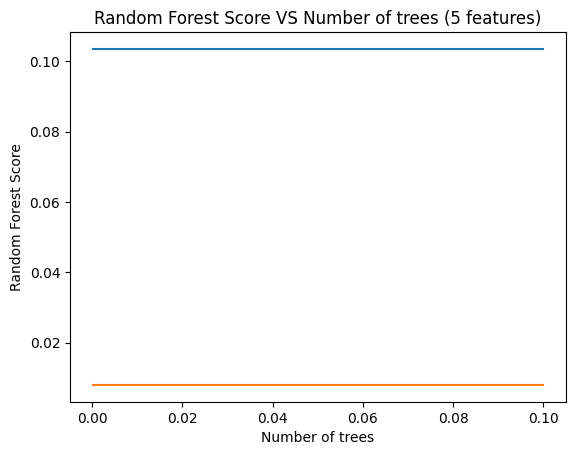

In [34]:
opt_table_estimators_accuracy=list()
opt_table_estimators_f1=list()
list_para = [0.0001, 0.001, 0.01, 0.1]

for i in list_para:
    model = CategoricalNB(alpha=i,min_categories=31, fit_prior=True)
    model.fit(X_train,y_train.values.ravel())
    output=model.predict(X_test)
    opt_table_estimators_accuracy.append(metrics.accuracy_score(y_test, output))
    opt_table_estimators_f1.append(metrics.f1_score(y_test, output, average='macro'))
plt.plot(list_para, opt_table_estimators_accuracy)
plt.plot(list_para, opt_table_estimators_f1)
plt.xlabel('Number of trees')
plt.ylabel('Random Forest Score')
plt.title('Random Forest Score VS Number of trees (5 features)')
plt.show()

These initial results are very interesting. First of all, the probability of correctly ranking one of the sectors at random is 1/31 = 0.032. The results with this method for Accuracy are around 0.103, which is much higher than 0.032 and may lead us to believe that this represents a good model. However, the results with the f1 'macro' score are lower than with the random ranking method.
These results clearly show that our dataset is imbalanced, in that the model might be expected just to rank products from categories with a large number of products and never to rank the other categories, which is not what we're interested in.

In [35]:
opt_table_estimators_accuracy

[0.10349544072948329,
 0.10349544072948329,
 0.10349544072948329,
 0.10349544072948329]

## III) Conclusion